In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, log_loss, hinge_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('masterdataframe.csv') #reading the file

# transform sub into 0, KO into 1
df['method'].replace({"SUB": 0, "KO/TKO": 1}, inplace = True)

#removing most of the columns and leaving specific ones
df = df[['result', 'method', 'sub_attempts', 'takedowns_attempts',
         'total_strikes_attempts', 'takedowns_accuracy', 'total_strikes_accuracy']]

#only looking at KO or SUB outcomes
win = df.loc[(df['result'] == 1) & df['method'].isin([0,1])] #only look at winners and situations ending in a TKO/KO or submission



#checking for null values
win.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 1 to 13319
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   result                  3515 non-null   int64  
 1   method                  3515 non-null   object 
 2   sub_attempts            3515 non-null   int64  
 3   takedowns_attempts      3515 non-null   int64  
 4   total_strikes_attempts  3515 non-null   int64  
 5   takedowns_accuracy      3515 non-null   float64
 6   total_strikes_accuracy  3515 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 219.7+ KB


In [2]:
# check for imbalances in number of datapoints
countko = win['method'].value_counts()[1]
countsub = win['method'].value_counts()[0]

print(f"The number of KOs is {countko} and Subs is {countsub}")
      

The number of KOs is 2193 and Subs is 1322


In [3]:
# set features and labels
y = win[['method']].astype(int)
X = win[['takedowns_attempts', 'takedowns_accuracy', 'total_strikes_attempts',
         'total_strikes_accuracy', 'sub_attempts']]


In [4]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# training the data for logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [6]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train.values.ravel())


SVC(kernel='linear')

In [7]:
# training data predictions
y_pred_lr = lr.predict(X_train)
y_pred_svc = svc.predict(X_train)


In [8]:
# testing data predictions
y_pred_test_lr = lr.predict(X_test)
y_pred_test_svc = svc.predict(X_test)

In [9]:
# validation data predictions
y_pred_val_lr = lr.predict(X_val)
y_pred_val_svc = svc.predict(X_val)



In [10]:
# check the errors of the different subsets
error_lr = log_loss(y_train, y_pred_lr)
error_svc = hinge_loss(y_train, y_pred_svc)

error_test_lr = log_loss(y_test, y_pred_test_lr)
error_test_svc = hinge_loss(y_test, y_pred_test_svc)

error_val_lr = log_loss(y_val, y_pred_val_lr)
error_val_svc = hinge_loss(y_val, y_pred_val_svc)

print('Logistic Regression')
print('the training error was:', error_lr)
print('the testing error was:', error_test_lr)
print('the validation error was:', error_val_lr)

print('SVC')
print('the training error was:', error_svc)
print('the testing error was:', error_test_svc)
print('the validation error was:', error_val_svc)

Logistic Regression
the training error was: 2.7430091839513056
the testing error was: 2.4097463859011468
the validation error was: 2.4097463859011468
SVC
the training error was: 0.4359886201991465
the testing error was: 0.47083926031294454
the validation error was: 0.47083926031294454


In [11]:
acc_lr = accuracy_score(y_val, y_pred_val_lr)
acc_svc = accuracy_score(y_val, y_pred_val_svc)



print(acc_lr)
print(acc_svc)

0.9331436699857752
0.930298719772404


In [12]:
# k-fold cross-validation for logistic regression
k_folds = KFold(n_splits = 5)
scores_lr = cross_val_score(lr, X, y.values.ravel(), cv = k_folds)
print(scores_lr.mean())

0.923470839260313


In [13]:
# k-fold cross-validation for svc
k_folds = KFold(n_splits = 5)
scores_svc = cross_val_score(svc, X, y.values.ravel(), cv = k_folds)
print(scores_svc.mean())

0.9331436699857752


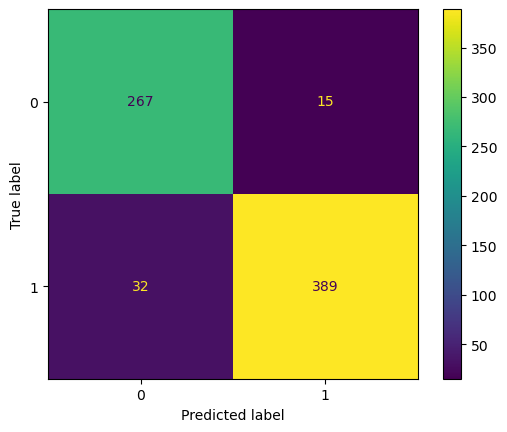

In [14]:
# confusion matrix test for logistic regression

cm = confusion_matrix(y_test, y_pred_test_lr)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()


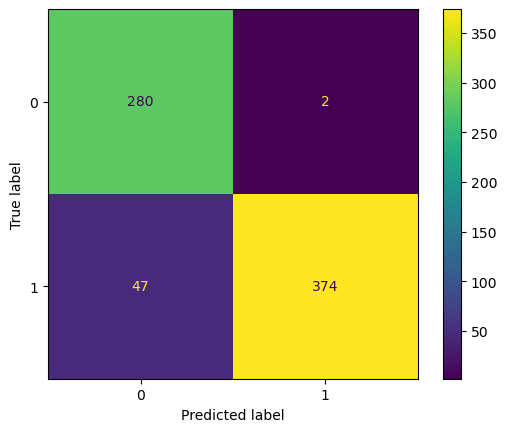

In [15]:
# confusion matrix test for SVC

cm = confusion_matrix(y_test, y_pred_test_svc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()

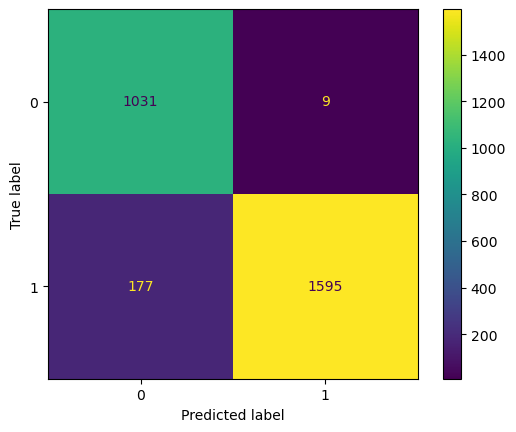

In [17]:
cm = confusion_matrix(y_train, y_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()